# Homework 3- Robust Estimates




## Question 1 Robust Esimators

* Use the data in spy_rates
* This set provides data on various asset classes.
* Use the multivariate regression model in homework 2 of SPY on the dividend-price ratio and tresury rate. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import seaborn as sns

In [2]:
plt.style.use("seaborn")
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
spyrate = pd.read_excel("C:/Users/dcste/OneDrive/Uchicago_practice/spy_rate_data (1).xlsx")
spyrate = spyrate.rename(columns = {"Unnamed: 0" : "Date"}).set_index("Date")

In [17]:
spyrate.mean()

SPY US Equity      0.005874
10-yr Yields       0.034512
Dvd-Price Ratio    0.018380
dtype: float64

Calculate the regression : $r_{spy,t} = \alpha + \beta_{yield,t} + \beta_{dvd/p,t} + e$

This regression estimates the impact that the 10 year treasury yield and divident-price yield has on SPY returns. 

In [4]:
spyreturn = spyrate["SPY US Equity"]
independ_var = sm.add_constant(spyrate.drop(columns = "SPY US Equity"))
estimation = sm.OLS(spyreturn , independ_var).fit()
estimation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.465
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0125
Time:                        00:16:14   Log-Likelihood:                 423.48
No. Observations:                 239   AIC:                            -841.0
Df Residuals:                     236   BIC:                            -830.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0741      0.023      3.191      0.002       0.028       0.120
10-yr Yields       -0.7707      0.280     -2.754      0.006      -1.322      -0.219
Dvd-Price Ratio    -2.2646      0.849     -2.669      0.008      -3.936      -0.593
==============================================================================
Omnibus:                        6.566   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.427
Skew:                          -0.333   Prob(JB):                       0.0402
Kurtosis:                       3.448   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Calculate the correlation between $\epsilon_{t}$ and $\epsilon_{t-1}$.

In [5]:
residuals = estimation.resid
rho = residuals.corr(residuals.shift(1))
print(f"The correlation between the residuals at t and (t-1) is {rho:.3%}.")

The correlation between the residuals at t and (t-1) is 5.089%.


A correlation of 5.089% means there is a very small positive linear relationship. In theory we expected $E[cov(u_{t},u_{t-1}) = 0]$.

Calculate the regression of $e_{t} = \alpha + \beta_{yield,t} + \beta_{dvd/p,t} + e_{t}$

In [6]:
mod1 = sm.OLS(residuals**2, independ_var).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     8.172
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           0.000370
Time:                        00:16:15   Log-Likelihood:                 1087.1
No. Observations:                 239   AIC:                            -2168.
Df Residuals:                     236   BIC:                            -2158.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0041      0.001     -2.840      0.005      -0.007      -0.001
10-yr Yields        0.0586      0.017      3.367      0.001       0.024       0.093
Dvd-Price Ratio     0.2053      0.053      3.887      0.000       0.101       0.309
==============================================================================
Omnibus:                      150.121   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1029.503
Skew:                           2.511   Prob(JB):                    2.79e-224
Kurtosis:                      11.841   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What do the previous two calculations have to do with identifying serial correlation and heteroskedasticity?

The regression of the residuals squared on the independent variables gives us information on whether or not the residual variance is always the same distribution(**homoskedastic**) or whether the residual variance varies with *X* (**heteroskedastic**). From the regression output above we get an F-stat = 8.1 meaning we reject the null-hypothesis of homoskedasticity and conclude the error terms depend on the independent variables. 

## Homework 3 - Robust Estimators

1. Calculate the residuals from the multivariate regression model. Also compute the first lag of the residuals. Plot the residuals and the first lag of residuals using a scatterplot. Calculate the correlation between the two. Interpret the results

2. Compute and Display the ACF plot for the residuals.

In [7]:
df_resid = pd.DataFrame(residuals , columns = ["resid"])
lag_resid = pd.DataFrame(residuals.shift(), columns = ["lag_resid"])
residual_df = pd.concat((df_resid,lag_resid), axis = 1).dropna()
residual_df.corr()

,resid,lag_resid
resid,1.000000,0.050893
lag_resid,0.050893,1.000000


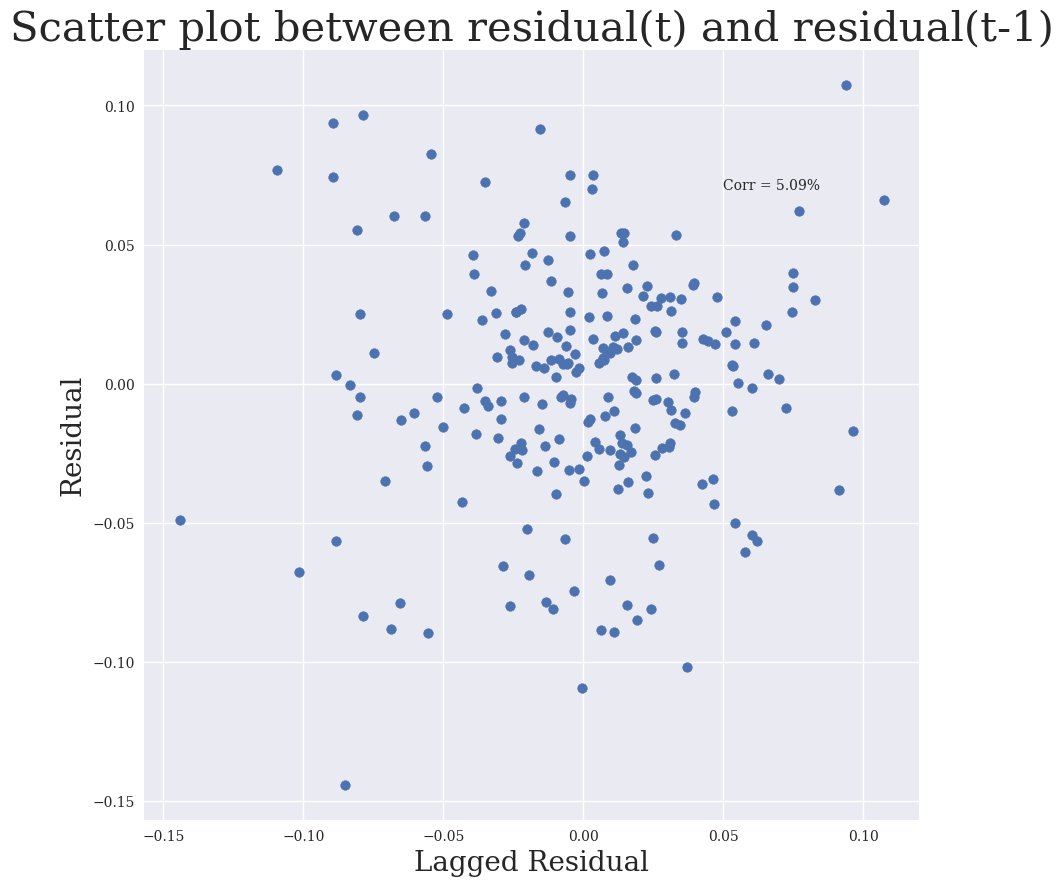

In [8]:
# Producing a scatter plot between the residuals and the lag residuals
plt.figure(figsize = (10,10))
plt.scatter(residual_df["lag_resid"], residual_df["resid"])
plt.xlabel("Lagged Residual", fontsize = 20)
plt.ylabel("Residual", fontsize = 20)
plt.title("Scatter plot between residual(t) and residual(t-1)", fontsize = 30)
plt.annotate("Corr = {:,.2%}".format(residual_df["resid"].corr(residual_df["lag_resid"])), (.05,.07))
plt.show()

A correlation of 5% does not indicate significant serial correlation in the sample residuals. To test for correlation between higher lags we need an autocorrelation plot and the Durbin Watson Test is another method to see if serial correlation is present. 

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_resid, lags = 20, ax = ax, title = "Autocorrelation Plot")

NameError: name 'ax' is not defined

From the autocorrelation plot we can see there is not evidence of serial correlation. 

## Durbin Watson Test


   $DW=\frac{\sum_{t=2}^{n} (u_t - u_{t-1})^{2}}{\sum_{t=1}^{n}u^{2}}$

* Compute the Durbin-Watson Statistic

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = float(durbin_watson(df_resid))
print("The Durbin-Watson Statistic is equal to: {:.4f}".format(dw))

The Durbin-Watson Statistic is equal to: 1.8867


*The DW statistic ranges from zero to four, with a value of 2.0 indicating zero autocorrelation. Values below 2.0 mean there is positive autocorrelation and above 2.0 indicates negative autocorrelation. In this case, since the value is close to 2, we can say that autocorrealtion is not observed. 

## Heteroskedasticity and White's Test

1. Create a scatterplot of the model residuals against the fitted values and the model regressors. Do you see any patterns. What can you conclude?

2. Calculate White's test for heteroskedasticity. Display the test statistic and the p-value. State the null and the alternative hypothesis for this test. Interpret your results. What can you conclude?

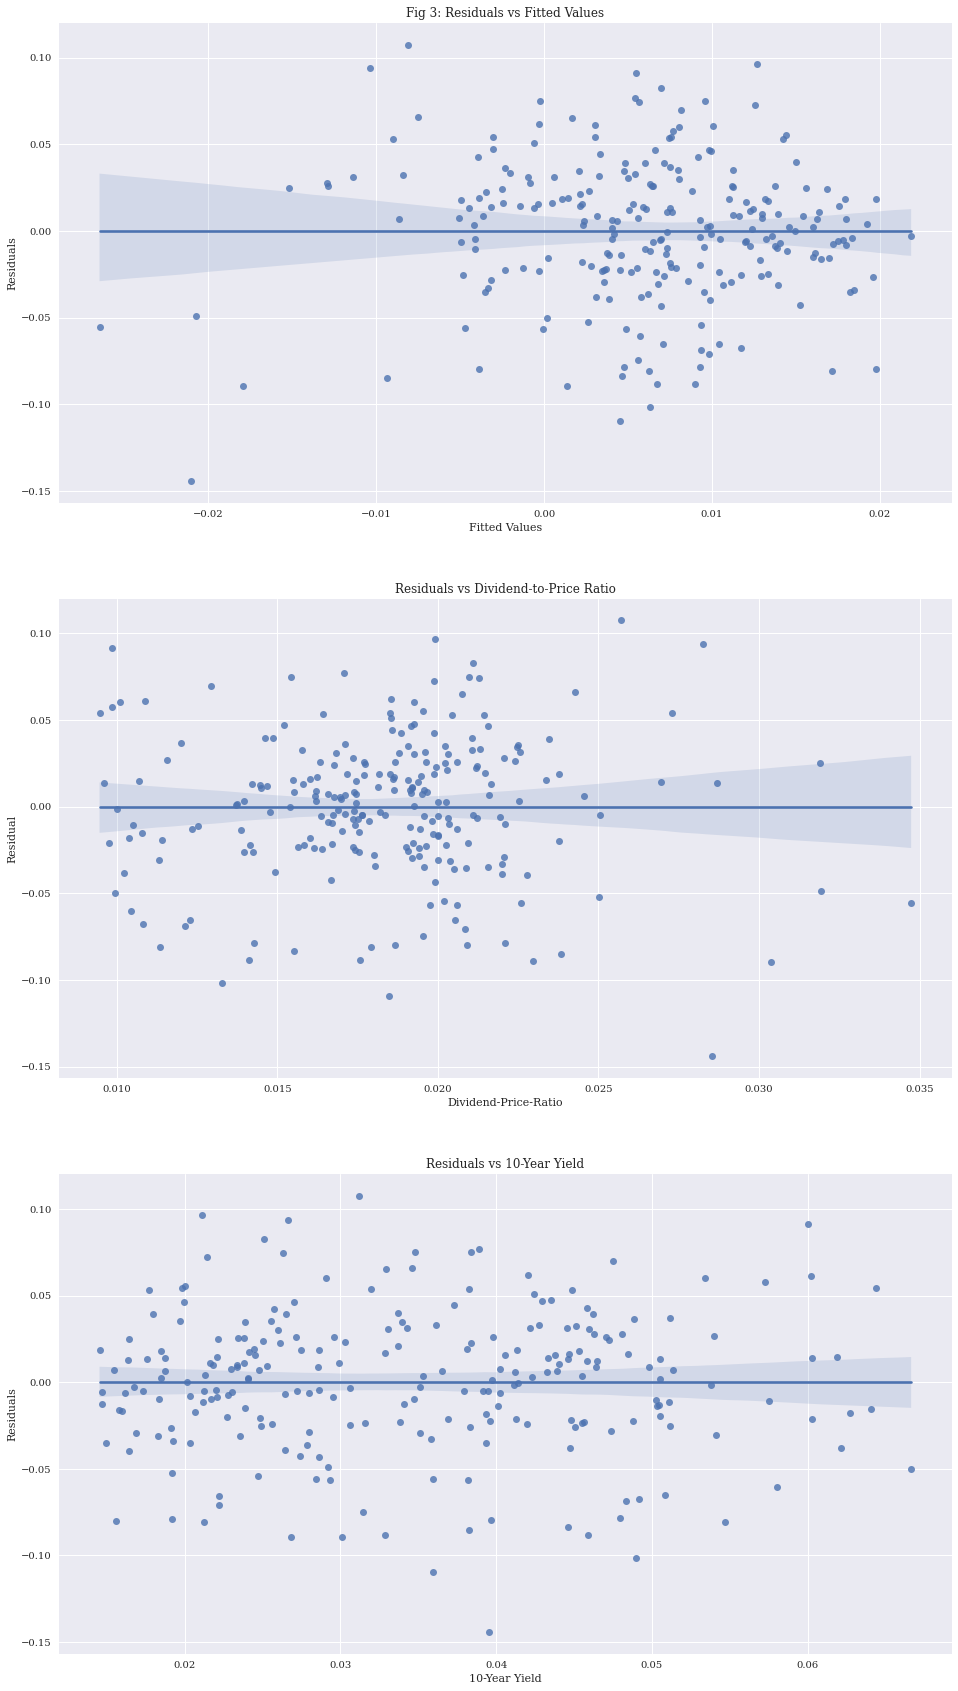

In [ ]:
fitted_values = pd.DataFrame(estimation.fittedvalues, columns = ["Fitted Values"])
div_price_ratio = spyrate["Dvd-Price Ratio"]
US_Tres = spyrate["10-yr Yields"]
fig, ax = plt.subplots(3,1, figsize = (16,30))

sns.regplot(x = fitted_values, y = residuals, ax = ax[0])
ax[0].set_ylabel('Residuals')
ax[0].set_xlabel('Fitted Values')
ax[0].set_title('Fig 3: Residuals vs Fitted Values')

sns.regplot(x = div_price_ratio, y = residuals, ax = ax[1])
ax[1].set_ylabel("Residual")
ax[1].set_xlabel("Dividend-Price-Ratio")
ax[1].set_title("Residuals vs Dividend-to-Price Ratio")

sns.regplot(x = US_Tres, y = residuals, ax = ax[2])
ax[2].set_ylabel("Residuals")
ax[2].set_xlabel("10-Year Yield")
ax[2].set_title("Residuals vs 10-Year Yield")

plt.show()

,resid
Date,
1999-10-31,0.061022
1999-11-30,0.014480
1999-12-31,0.054078
2000-01-31,-0.049956
2000-02-29,-0.015486
...,...
2019-04-30,0.024029
2019-05-31,-0.080913
2019-06-30,0.055212


In [ ]:
estimation.predict()

array([ 3.05551696e-03,  2.17148586e-03,  3.01106532e-03,  1.69086786e-04,
        2.60293623e-04,  5.48331513e-03,  3.06719614e-03,  2.23562613e-03,
        5.88892111e-03,  5.54243843e-03,  7.65404902e-03,  5.70635613e-03,
        5.98846628e-03,  6.25153827e-03,  6.29369825e-03,  7.48757602e-03,
        6.30080549e-03,  1.17075844e-02,  1.00729125e-02,  9.93172197e-03,
        6.78732152e-03,  9.28159792e-03,  9.36212441e-03,  6.72938628e-03,
        9.88536118e-03,  8.16250963e-03,  4.03954203e-03,  3.87028985e-03,
        4.49743098e-03,  6.32637432e-03,  7.11101992e-03,  7.26714905e-03,
        4.78271349e-03,  4.61815564e-03,  7.30384201e-03,  4.51986264e-03,
        5.40477539e-03, -3.22943343e-04, -6.11326060e-05, -2.31802753e-03,
        7.84875390e-03,  6.95699491e-03,  9.60476480e-03,  1.50125964e-02,
        1.35925831e-02,  7.30940258e-03,  7.52513080e-03,  7.49161072e-03,
        6.59584215e-03, -3.16317760e-03, -5.95051748e-04,  1.09349275e-03,
        1.24012147e-02,  